In [52]:
!pip install -q yfinance
!pip install pandas-datareader

     ---------------------------------------- 12.8/12.8 MB 6.0 MB/s eta 0:00:00


DEPRECATION: https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.3.0/en_core_web_sm-3.3.0-py3-none-any.whl#egg=en_core_web_sm==3.3.0 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617


[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [54]:
import pandas as pd
import numpy as np
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime
import matplotlib.pyplot as plt

In [77]:
!pip install keras
!pip install keras tensorflow
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

  Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl (895 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Rolling back uninstall of protobuf
  Moving to c:\users\saura\anaconda3\lib\site-packages\protobuf-3.20.3-py3.9.egg-info
   from C:\Users\saura\anaconda3\Lib\site-packages\~rotobuf-3.20.3-py3.9.egg-info


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\saura\\anaconda3\\Lib\\site-packages\\google\\protobuf\\internal\\_api_implementation.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



[*********************100%***********************]  1 of 1 completed
4/4 [==============================] - 2s 108ms/step


C:\Users\saura\AppData\Local\Temp/ipykernel_3940/325166552.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


[*********************100%***********************]  1 of 1 completed
4/4 [==============================] - 1s 115ms/step


C:\Users\saura\AppData\Local\Temp/ipykernel_3940/325166552.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


[*********************100%***********************]  1 of 1 completed
4/4 [==============================] - 2s 98ms/step


C:\Users\saura\AppData\Local\Temp/ipykernel_3940/325166552.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


[*********************100%***********************]  1 of 1 completed
4/4 [==============================] - 1s 75ms/step


C:\Users\saura\AppData\Local\Temp/ipykernel_3940/325166552.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


[*********************100%***********************]  1 of 1 completed
4/4 [==============================] - 1s 87ms/step


C:\Users\saura\AppData\Local\Temp/ipykernel_3940/325166552.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


[*********************100%***********************]  1 of 1 completed
4/4 [==============================] - 1s 83ms/step


C:\Users\saura\AppData\Local\Temp/ipykernel_3940/325166552.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


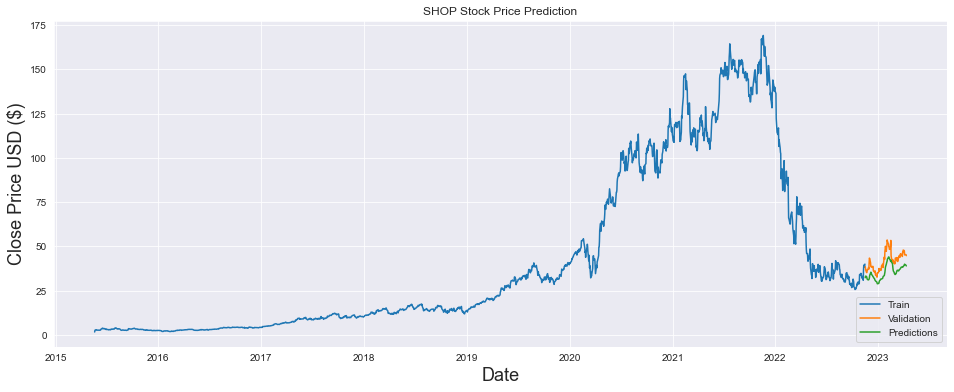

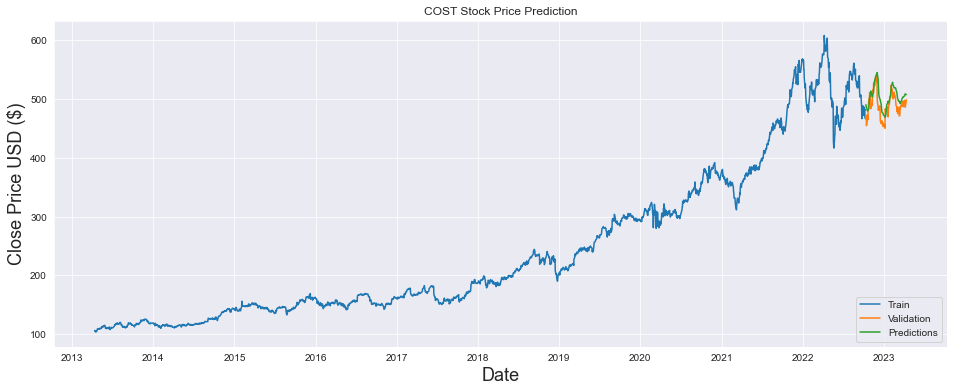

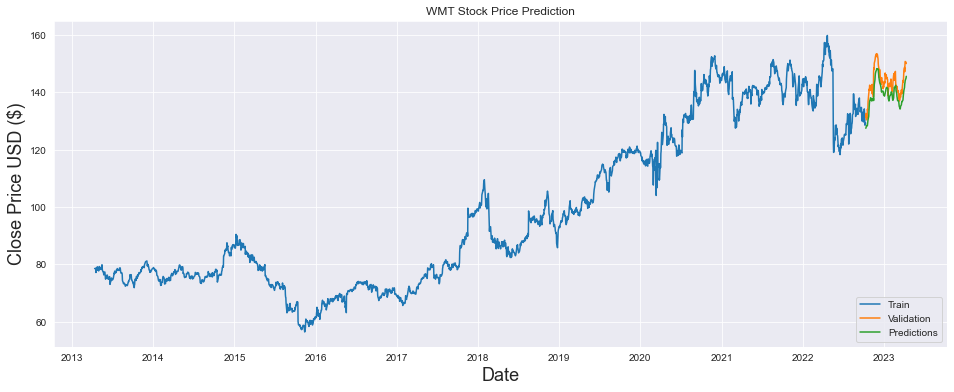

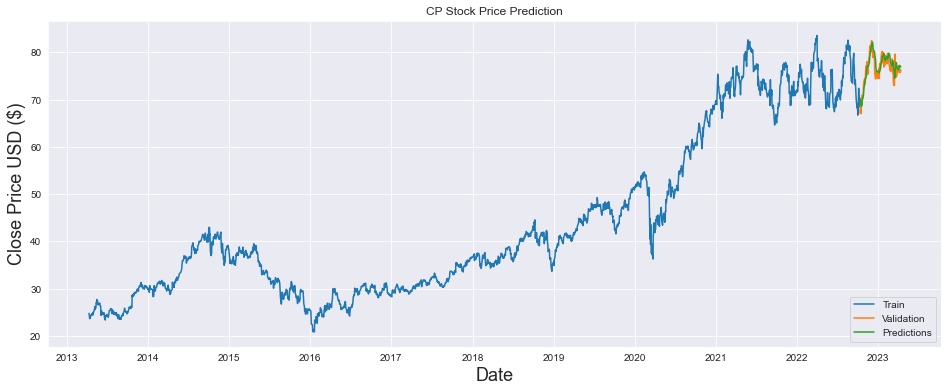

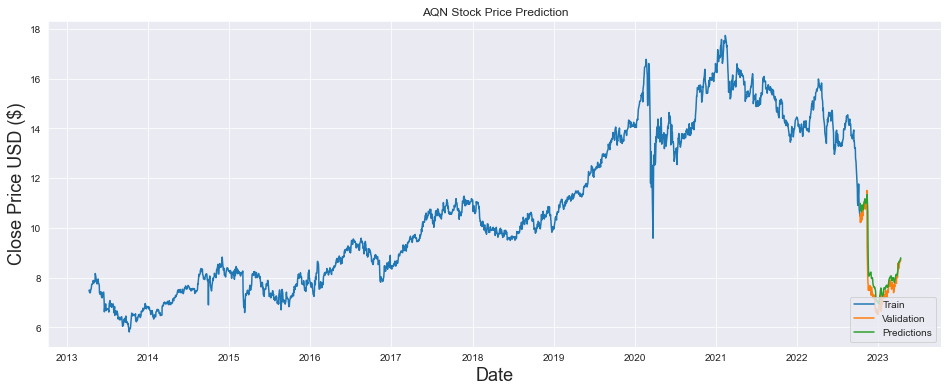

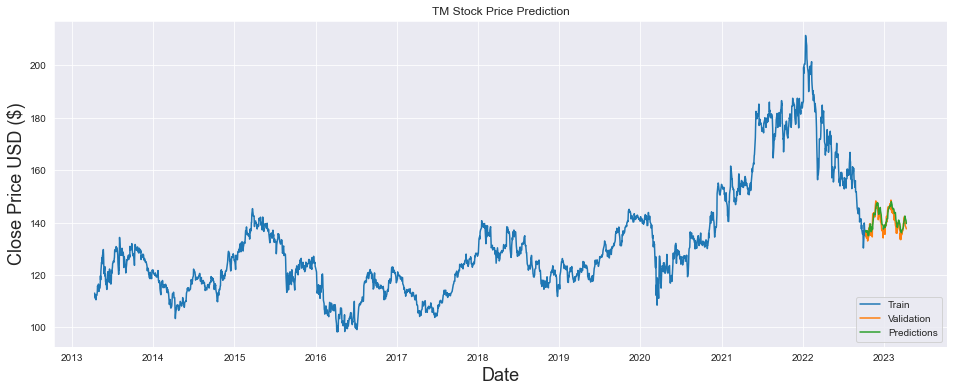

In [83]:
# Define the list of companies to download data for
tech_list = ['SHOP', 'COST', 'WMT', 'CP', 'AQN', 'TM']

# Define start and end dates
end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)

# Download data for each company and perform prediction
for stock in tech_list:
    # Download data
    df = pdr.get_data_yahoo(stock, start=start, end=end)

    # Select only the 'Close' column
    data = df.filter(['Close']).values

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    # Define the length of the training data
    training_data_len = int(np.ceil(len(data) * .95))

    # Create the training data set
    train_data = scaled_data[0:training_data_len, :]

    # Split the training data set into x_train and y_train
    x_train = []
    y_train = []
    for i in range(60, len(train_data)):
        x_train.append(train_data[i - 60:i, 0])
        y_train.append(train_data[i, 0])

    # Convert x_train and y_train to numpy arrays
    x_train, y_train = np.array(x_train), np.array(y_train)

    # Reshape the data
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(x_train, y_train, batch_size=1, epochs=1)

    # Create the testing data set
    test_data = scaled_data[training_data_len - 60:, :]
    x_test = []
    y_test = data[training_data_len:, :]
    for i in range(60, len(test_data)):
        x_test.append(test_data[i - 60:i, 0])
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    # Make predictions
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)

    # Calculate RMSE
    rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

    # Create dataframe for visualization
    train = df.iloc[:training_data_len, :]
    valid = df.iloc[training_data_len:, :]
    valid['Predictions'] = predictions

    # Visualize the data
    plt.figure(figsize=(16, 6))
    plt.title(f'{stock} Stock Price Prediction')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions']])
    plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')

2023-04-11 14:49:00.603 
  command:

    streamlit run C:\Users\saura\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


[*********************100%***********************]  1 of 1 completed
4/4 [==============================] - 1s 26ms/step


C:\Users\saura\AppData\Local\Temp/ipykernel_3940/322570788.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


<bound method PyplotMixin.pyplot of DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)>

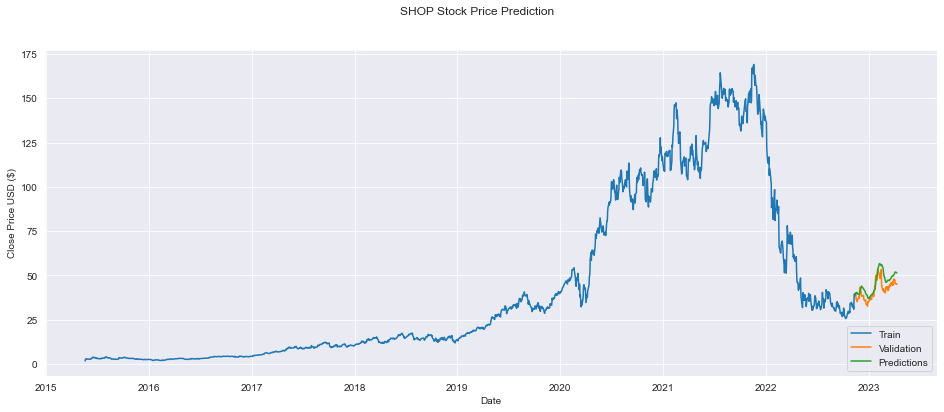

In [81]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from pandas_datareader import data as pdr
from datetime import datetime

# Set title of the web app
st.title('Stock Price Prediction')

# Define the list of companies to download data for
tech_list = ['SHOP', 'COST', 'WMT', 'CP', 'AQN', 'TM']
selected_stock = st.selectbox('Select a stock', tech_list)

# Define start and end dates
end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)

# Download data
df = pdr.get_data_yahoo(selected_stock, start=start, end=end)

# Select only the 'Close' column
data = df.filter(['Close']).values

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define the length of the training data
training_data_len = int(np.ceil(len(data) * .95))

# Create the training data set
train_data = scaled_data[0:training_data_len, :]

# Split the training data set into x_train and y_train
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60:i, 0])
    y_train.append(train_data[i, 0])

# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Create the testing data set
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = data[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Make predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Calculate RMSE
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

# Create dataframe for visualization
train = df.iloc[:training_data_len, :]
valid = df.iloc[training_data_len:, :]
valid['Predictions'] = predictions

# Plot the data
fig, ax = plt.subplots()
ax.plot(train['Close'])
ax.plot(valid[['Close', 'Predictions']])
ax.set_xlabel('Date')
ax.set_ylabel('Close Price USD ($)')
ax.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
fig.set_size_inches(16, 6)
fig.suptitle(f'{selected_stock} Stock Price Prediction')

# Display RMSE
st.write(f'Root Mean Squared Error: {rmse}')

# Display plot in the Streamlit app
st.pyplot
